In [53]:
if (!require("mada")) install.packages("mada", dependencies = TRUE)
library(mada)
library(pROC)

In [54]:
df <- data.frame(
  TP = c(35, 502, 1059, 43, 77, 32, 69, 168, 34, 212, 1568, 44, 29, 279),
  FN = c(3, 5, 92, 5, 3, 3, 6, 107, 13, 46, 31, 0, 0, 14),
  FP = c(60, 349, 1717, 161, 349, 36, 80, 324, 85, 472, 3233, 291, 44, 355),
  TN = c(20, 19, 303, 16, 11, 17, 33, 925, 74, 437, 135, 69, 27, 68)
)

df

TP,FN,FP,TN
<dbl>,<dbl>,<dbl>,<dbl>
35,3,60,20
502,5,349,19
1059,92,1717,303
43,5,161,16
77,3,349,11
32,3,36,17
69,6,80,33
168,107,324,925
34,13,85,74


Call:  reitsma.default(data = df)

Bivariate diagnostic random-effects meta-analysis
Estimation method: REML

Fixed-effects coefficients
                  Estimate Std. Error     z Pr(>|z|) 95%ci.lb 95%ci.ub    
tsens.(Intercept)    2.377      0.284 8.372    0.000    1.820    2.933 ***
tfpr.(Intercept)     1.342      0.339 3.955    0.000    0.677    2.007 ***
sensitivity          0.915          -     -        -    0.861    0.949    
false pos. rate      0.793          -     -        -    0.663    0.882    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Variance components: between-studies Std. Dev and correlation matrix
      Std. Dev tsens  tfpr
tsens    1.016 1.000     .
tfpr     1.255 0.984 1.000

 logLik     AIC     BIC 
 33.113 -56.227 -49.566 

AUC:  0.719
Partial AUC (restricted to observed FPRs and normalized):  0.819

I2 estimates 
Zhou and Dendukuri approach:  13.9 % 
Holling sample size unadjusted approaches:  15 - 60.1 % 
Holling sample size adjusted a

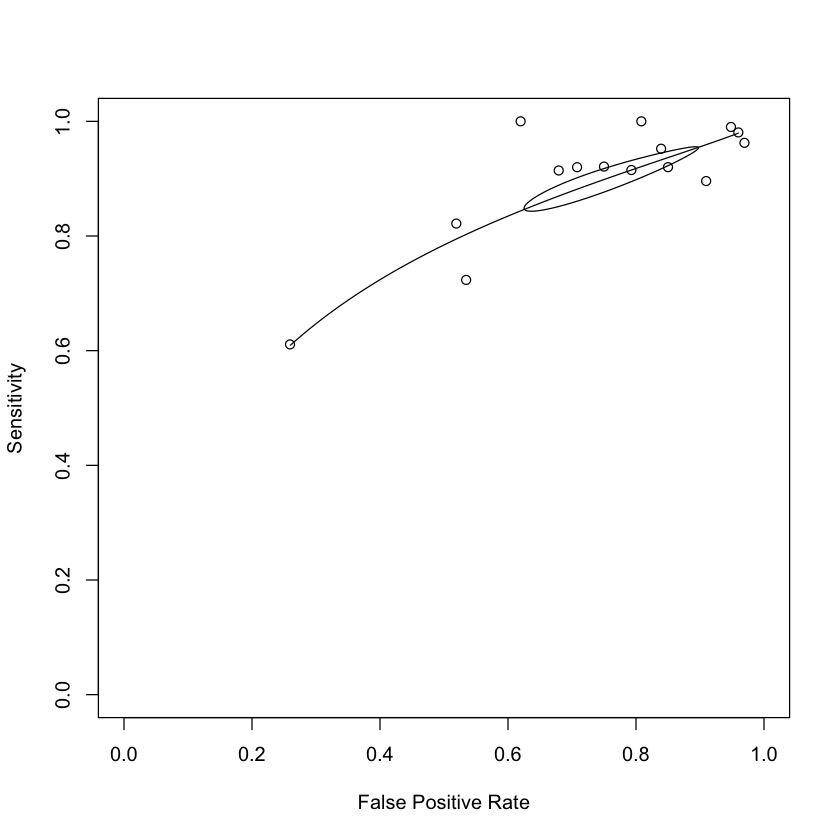

In [55]:
model <- reitsma(df)
plot(model)

points(1 - spec(df), sens(df))
summary(model)

In [56]:
# about 20s
# STATA MIDAS

n_bootstrap <- 1000

auc_values <- numeric(n_bootstrap)

set.seed(1)
for (i in 1:n_bootstrap) {
  sample_indices <- sample(1:nrow(df), nrow(df), replace = TRUE)
  sample_df <- df[sample_indices, ]
  auc_values[i] <- AUC(reitsma(sample_df))$AUC
}

# Compute the confidence interval
ci <- quantile(auc_values, probs = c(0.025, 0.975))

# Display the results
cat("AUC 95% Confidence Interval:", ci, "\n")

In [ ]:
AUC(model)$AUC

[1] 0.7188904

In [ ]:
AUC(model)$AUC - ci[1]

2.5% 
0.05947025

In [ ]:
ci[2] - AUC(model)$AUC

97.5% 
0.05485961